<a href="https://colab.research.google.com/github/kookeej/DILAB/blob/main/7.29-8.11/cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

군집 분석 (Cluster Analysis)
===
>### Reference
>> https://www.youtube.com/watch?v=YJSHBQj8zbU&list=PL7ZVZgsnLwEEoHQAElEPg7l7T6nt25I3N&index=3

```군집 분석```이란? 특징이 유사한 데이터들끼리 묶는 것을 의미한다. 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 툭징을 분석하는 기법이다. 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과느 최대한 유사하지 않도록 분류한다. 

## 텍스트 유사도
텍스트 유사도에는 ```자카드 유사도```와 ```코사인 유사도```가 있다. 텍스트 쌍에 대한 ```자카드 유사도```와 ```코사인 유사도```를 계산한다.

* ```자카드 유사도```: 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용하여 계산한다.
* ```코사인 유사도```: 벡터 표현 사이의 각도에 대한 코사인 값을 사용한다. BoW와 TF-IDF 행렬은 텍스트에 대한 벡텨 표현으로 활용 가능하다.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


cosine similarity는 sklearn에 포함되어 있는 모듈을 그대로 이용하고 jaccard similarity는 직접 정의한다.

In [ ]:
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()

    # 문서 d1으로부터 가져온 단어들을 먼저 소문자로 만든다.
    # lemmatize()를 사용하여 표제어를 추출한다.
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

    # intersection은 두 set 사이의 공통된 요소들을 담은 새로운 set을 return한다.
    # 이 set의 length를 구하면 수를 구할 수 있다.
    inter = len(set(words1).intersection(set(words2)))

    # union은 모든 set에서 고유한 요소가 포함된 새로운 set을 return한다.
    union = len(set(words1).union(set(words2)))

    return inter/union

In [ ]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

# 세 개의 텍스트 사이의 유사도를 자카르를 사용하여 측정한다.
print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


d1과 d2가 가장 유사하다. 

이번에는 코사인 유사도를 사용해본다. 코사인 유사도를 사용하기 위해서는 벡터 표현이 필요하다. 

In [ ]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf =tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


TF-IDF를 기반으로한 코사인 유사도를 살펴보았다.

## 한국어 형태소 분석기 설치


In [ ]:
!pip install konlpy

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

## 데이터 전처리


In [ ]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [ ]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [ ]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성
```word2vec```를 이용하여 각 단어를 벡터라이징 공간에 임베딩한다.

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

```Word2Vec``` 모델을 생성한다. ```gensim```의 ```Word2Vec```은 선언과 동시에 학습을 해 단어 벡터들을 생성한다.

In [ ]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [ ]:
# '영화'와 유사한 단어들의 유사도를 나타낸다.
# 아래에 벡터 공간에 임베딩된 단어들은 모두 계산이 가능하다.
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('작품', 0.9671905636787415),
 ('마음', 0.9610488414764404),
 ('이야기', 0.9502374529838562),
 ('라는', 0.9489350914955139),
 ('표현', 0.9469910860061646),
 ('에게', 0.9466334581375122),
 ('통해', 0.9464021921157837),
 ('삶', 0.946344256401062),
 ('가슴', 0.9462488293647766),
 ('우리', 0.9454272389411926)]

```t-sne```를 사용하여 단어 벡터를 시각화한다.

In [ ]:
tsne = TSNE(n_components=2)     # 2차원으로 만든다.
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
vocab = word2vec.wv.vocab       # word2vec의 vocab들을 따로 저장한다.
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.28776875,  0.03814726, -0.10198709, ..., -0.28298962,
        -0.05150754,  0.0394549 ],
       [-0.45954782,  0.05962897, -0.03576984, ..., -0.7687156 ,
         0.08965641,  0.02660755],
       [-0.62380433,  0.35731825,  0.20453267, ..., -0.36680943,
        -0.15122968, -0.40764967],
       ...,
       [-0.05229013, -0.00600635, -0.02263975, ..., -0.04092567,
        -0.00468982,  0.00905478],
       [-0.05588607,  0.00668566, -0.02436307, ..., -0.03345498,
         0.00414081,  0.01594906],
       [-0.05857456,  0.00481017, -0.02412538, ..., -0.04309494,
        -0.00146151,  0.00455678]], dtype=float32)

In [ ]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)       # similarity를 2차원으로 바꿔준다.
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])        # 칼럼은 좌표값
df.head(10)

,x,y
어릴,23.702539,-11.151038
때,9.703003,-53.504353
보,4.389730,-59.656101
고,4.395381,-58.469143
지금,6.972382,-59.791126
다시,5.584396,-59.314720
봐도,7.250796,-60.613972
재밌,18.293993,-63.259594
어요,17.770452,-61.541809
ㅋㅋ,21.103493,-61.862873


이제 시각화를 할 때 이 좌표값을 그대로 찍어 그려주기만 하면 된다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


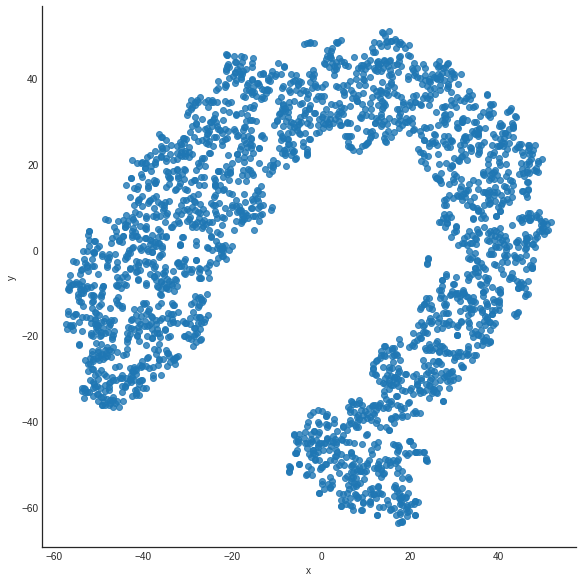

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

원래는 좀 더 고차원의 벡터 공간에 있겠지만 시각화를 위해서 2차원으로 바꿔주었다. 시각화를 통해 군집이 나타난 것을 확인할 수 있다.

## Scikit-learn, Scipy를 이용한 계층적 군집화
* ```계층적 군집화```란 개별 개체들을 유사한 개체나 그룹과 통합해 군집하를 수행하는 알고리즘이다.
* ```비계층적 군집화```와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점이다.
* ```계층적 군집화```는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산 복잡도도 비계층적 군집화보다 크다.

### Scikit-learn
```sklearn```에서는 비계층적 군집화의 일종인 ```agglomerativeClustering```(병합 군집)을 이용할 수 있다. 이것을 이용하여 계층적 군집화를 만들어볼 수 있다.    
* 병합 군집은 각 개체들을 cluster로 간주하고 종료 조건을 만족할 때까지 가장 비슷한 두 cluster들을 합치며 진행한다.    
* 병합 군집의 종료 조건으로 3가지를 지정할 수 있다.
>* ```ward```: 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합친다.(기본값)
>* ```average```: 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합친다.
>* ```complete```: 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합친다.       

**```ward```를 사용하는 것이 가장 효과적이다.**

종료 조건 사이의 차이를 비교해보자.

### ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([5, 2, 2, ..., 3, 3, 3])

In [ ]:
results = df
results['predict'] = predict
results.head(10)

,x,y,predict
어릴,23.702539,-11.151038,5
때,9.703003,-53.504353,2
보,4.389730,-59.656101,2
고,4.395381,-58.469143,2
지금,6.972382,-59.791126,2
다시,5.584396,-59.314720,2
봐도,7.250796,-60.613972,2
재밌,18.293993,-63.259594,2
어요,17.770452,-61.541809,2
ㅋㅋ,21.103493,-61.862873,2


위 결과를 확인해보면 문자가 어느 클러스터에 해당이 되는지를 나타내는 predict를 확인할 수 있다. 시각화로 나타내기 위해 해당 결과를 저장한다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


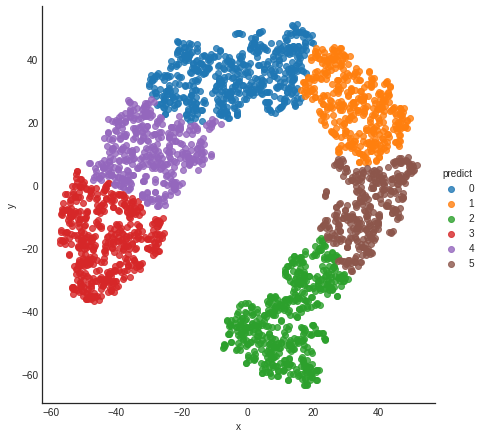

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')    # predict 부분으로 색이 구별되도록 한다.
plt.show()

비지도 학습이기 때문에 클러스터의 참/거짓 여부를 확인할 수 없지만 위와 같이 군집을 형성한 것을 확인할 수 있다.

### average

In [ ]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([3, 2, 2, ..., 5, 5, 5])

In [ ]:
results = df
results['predict'] = predict
results.head(10)

,x,y,predict
어릴,23.702539,-11.151038,3
때,9.703003,-53.504353,2
보,4.389730,-59.656101,2
고,4.395381,-58.469143,2
지금,6.972382,-59.791126,2
다시,5.584396,-59.314720,2
봐도,7.250796,-60.613972,2
재밌,18.293993,-63.259594,2
어요,17.770452,-61.541809,2
ㅋㅋ,21.103493,-61.862873,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


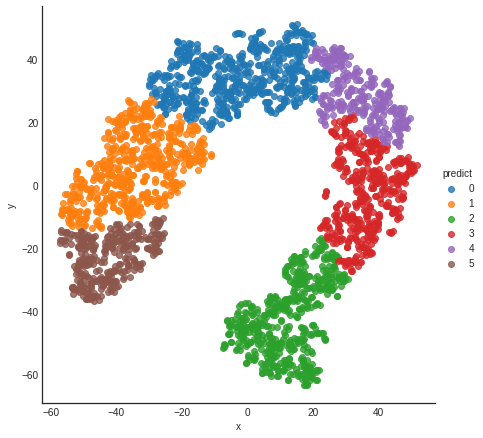

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')

### complete

In [ ]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
results = df
results['predict'] = predict
results.head(10)

,x,y,predict
어릴,23.702539,-11.151038,0
때,9.703003,-53.504353,0
보,4.389730,-59.656101,0
고,4.395381,-58.469143,0
지금,6.972382,-59.791126,0
다시,5.584396,-59.314720,0
봐도,7.250796,-60.613972,0
재밌,18.293993,-63.259594,0
어요,17.770452,-61.541809,0
ㅋㅋ,21.103493,-61.862873,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


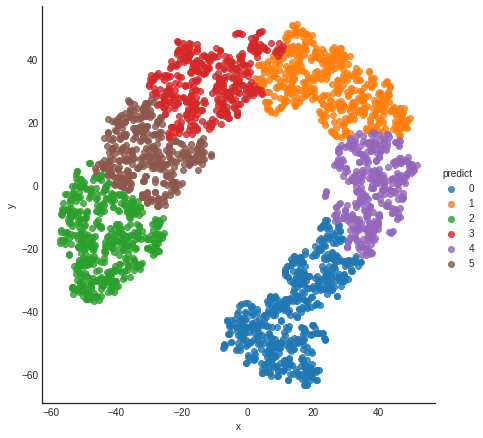

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')

## Scipy
```scipy```를 이용하여 거리를 비교해볼 수 있다.     
```pdist```를 이용하여 각 단어간 유클리디안 거리를 계산한다.
>### 유클리디안 거리란?
> 우리가 아는 바로 그 거리 공식이다.

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmetrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmetrix))
row_dist
# distance가 계산되어있는 결과 출력

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,44.607065,52.208483,51.105473,51.436916,51.458793,52.127168,52.388491,50.738737,50.778393,46.756960,40.109079,46.704308,51.547094,41.527365,42.846657,61.545768,41.575680,44.159734,43.815489,45.382200,77.514951,48.236220,51.323390,49.329524,45.110401,42.397207,51.083165,46.983220,21.330350,43.645378,29.769260,43.222908,49.571749,65.063865,32.217753,43.541272,42.778166,39.842022,32.293532,...,69.327267,67.067603,51.632077,79.671296,68.484807,64.657319,51.908826,53.949539,64.213359,70.884239,56.599522,57.349660,51.398795,64.420381,62.445011,74.902909,67.716199,77.011482,66.357020,52.059650,73.180771,61.123762,57.500153,17.185711,56.964184,71.117457,71.526789,63.650165,59.290648,55.465504,54.749620,75.986411,48.461961,77.804317,66.863927,63.522640,73.111946,68.846612,77.529374,75.567150
1,44.607065,0.000000,8.128645,7.267737,6.854182,7.122029,7.520638,12.998840,11.387908,14.136337,16.794902,17.864267,16.447987,95.169350,14.190676,17.993631,80.123552,17.294877,17.438898,17.560889,12.958158,64.363173,92.751291,94.508000,9.498009,13.789349,86.275724,10.918634,5.378853,27.014240,13.290608,17.671505,15.259784,6.448516,73.835188,14.009863,15.698086,1.839710,7.035063,72.694924,...,57.436675,76.649908,61.650257,74.664451,54.237032,70.089556,78.800017,79.537700,91.738629,58.043340,72.760745,59.802405,59.944510,53.097712,62.663709,66.725475,70.153035,66.337096,57.000712,53.566772,73.103384,55.986045,57.152641,60.447233,76.412721,67.914062,58.692154,64.341318,79.804641,79.051067,82.507515,64.897960,81.304847,64.558018,86.711888,54.223452,64.516234,57.773426,65.104771,69.573285
2,52.208483,8.128645,0.000000,1.186972,2.586178,1.242484,3.017153,14.363623,13.512943,16.858816,16.066338,20.077695,15.735954,102.199611,16.243058,19.059547,82.972181,18.951207,17.948112,18.221232,13.042072,61.878527,100.430188,101.413413,6.560127,13.976425,94.139402,12.624977,9.697743,35.136856,14.352506,23.838447,16.334943,2.993455,75.214902,20.520951,16.581856,9.783449,12.697435,80.761960,...,55.590793,78.061948,63.861828,73.407632,52.069080,71.020725,83.050577,83.557227,95.779990,55.953761,75.471608,60.737904,62.002078,51.663745,62.996566,65.169211,70.523405,64.283136,55.730071,54.767379,72.866518,55.672579,57.723947,68.275131,79.533928,67.301791,56.566674,64.671159,82.988501,82.759839,86.798170,62.824264,86.445095,62.044283,89.578910,53.152841,62.980595,56.084776,62.740105,68.329954
3,51.105473,7.267737,1.186972,0.000000,2.896303,1.459026,3.571231,14.701015,13.723477,17.049293,15.178694,18.983074,14.842680,101.037146,15.135630,18.036317,81.911204,17.885219,16.961449,17.224125,12.036446,61.362328,99.332116,100.244529,5.690703,12.975428,93.078971,12.871598,9.444461,34.217353,13.289210,22.660130,15.290123,1.817339,74.267331,19.358106,15.553406,8.842398,11.530396,79.787539,...,54.980990,77.112663,62.840562,72.737509,51.498341,70.110650,81.908036,82.425720,94.649139,55.376921,74.418180,59.820825,60.991773,50.996325,62.140004,64.530869,69.668080,63.709448,55.047073,53.821276,72.076910,54.877971,56.839311,67.214368,78.454005,66.550699,55.995373,63.816130,81.905346,81.644453,85.654335,62.251997,85.270791,61.532361,88.518153,52.442581,62.337802,55.454980,62.207786,67.654732
4,51.436916,6.854182,2.586178,2.896303,0.000000,1.467470,0.868671,11.840995,10.939069,14.282172,17.926969,21.292548,17.585717,101.833278,17.418879,20.556459,84.252710,20.294713,19.561012,19.802763,14.625830,64.256097,99.598498,101.120906,8.509669,15.567410,93.125551,10.060651,7.291366,33.686000,15.734491,23.796984,17.771342,4.243213,76.875702,20.299800,18.072823,8.665871,12.632280,79.432892,...,57.870279,79.718133,65.294180,75.611302,54.391869,72.786499,83.893810,84.478807,96.703525,

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

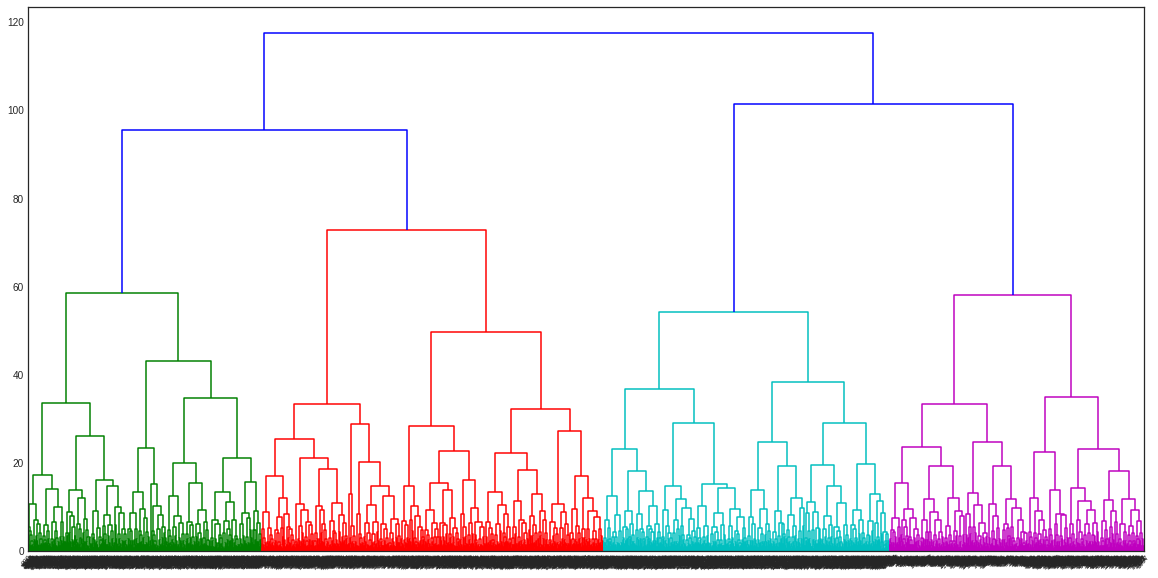

In [ ]:
row_clusters = linkage(distmetrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=7)

plt.show()

총 4개의 cluster가 형성되는 것을 확인할 수 있다.

* ```word2vec```을 이용한 군집 분석 및 덴드로그램 시각화


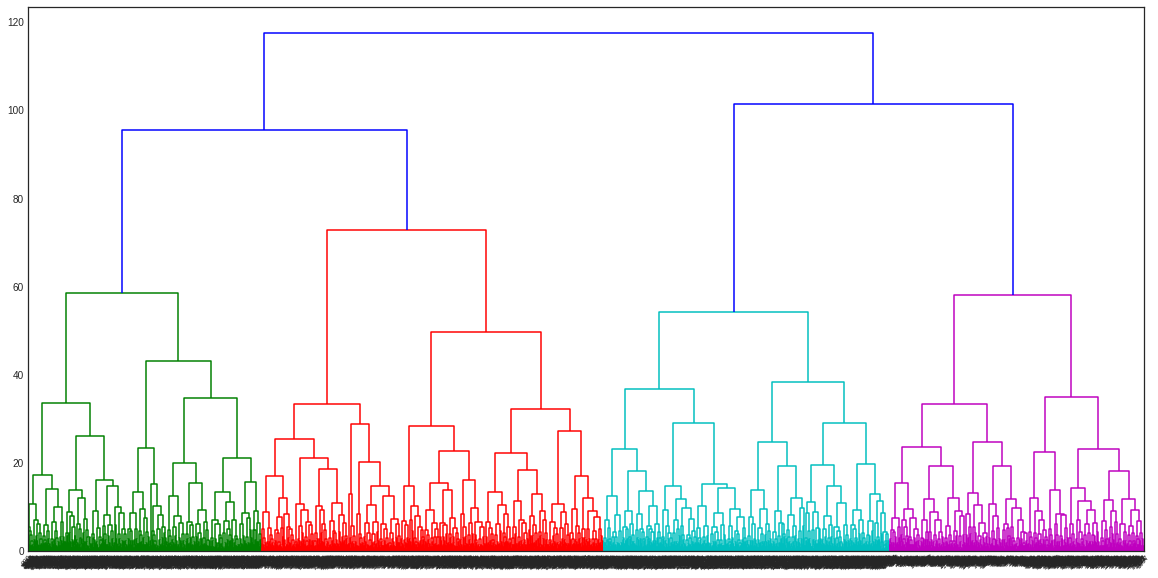

In [ ]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)

plt.show()

위의 결과와 유사한 결과가 나왔다. 

# Scikit-learn을 이용한 비계층적 군집화


* 비계층적 군집화란, 말그대로 계층을 두지않고 그룹화를 할 유사도 측정 방식에 따라 최적의 그룹(cluster)을 계속적으로 찾아나가는 방법이다.     
* **나눌 클러스터 개수**를 지정해 각 개체가 어느 클러스터에 속하는지를 결정하는 것이다.     
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하지만 클러스터의 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요하다.    
* 대표적인 비계층적 군집화 알고리즘으로 ```K-means```가 있다. 

## K-Means란?
K-means는 중심기반(Center-based) 클러스터링 방법으로 
**유사한 데이터는 중심점(centroid)을 기반으로 분포할 것이다**는 가정을 기반으로 한다.

n개의 데이터와 k(<=n)개의 중심점(centroid)이 주어졌을때 각 그룹 내의 데이터와 중심점 간의 비용(거리)을 최소화하는 방향으로 계속 업데이트를 해줌으로써 그룹화를 수행하는 기법이다.

*참조: https://yganalyst.github.io/ml/ML_clustering/*


## 클러스터의 개수 k=3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

각각의 값들에 클러스터 넘버가 표현되었다.

In [ ]:
results = df
results['predict'] = predict
results.head(10)

,x,y,predict
어릴,23.702539,-11.151038,1
때,9.703003,-53.504353,1
보,4.389730,-59.656101,1
고,4.395381,-58.469143,1
지금,6.972382,-59.791126,1
다시,5.584396,-59.314720,1
봐도,7.250796,-60.613972,1
재밌,18.293993,-63.259594,1
어요,17.770452,-61.541809,1
ㅋㅋ,21.103493,-61.862873,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


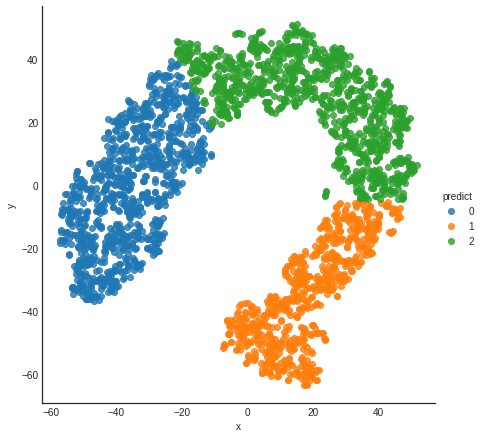

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')

cluster가 3개의 군집으로 구성된 것을 확인할 수 있다. K-means는 정해진 클러스터 개수를 기반으로 형성된다.

## 클러스터의 개수 k=6

In [ ]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([3, 2, 2, ..., 5, 5, 5], dtype=int32)

In [ ]:
results = df
results['predict'] = predict
results.head(10)

,x,y,predict
어릴,23.702539,-11.151038,3
때,9.703003,-53.504353,2
보,4.389730,-59.656101,2
고,4.395381,-58.469143,2
지금,6.972382,-59.791126,2
다시,5.584396,-59.314720,2
봐도,7.250796,-60.613972,2
재밌,18.293993,-63.259594,2
어요,17.770452,-61.541809,2
ㅋㅋ,21.103493,-61.862873,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


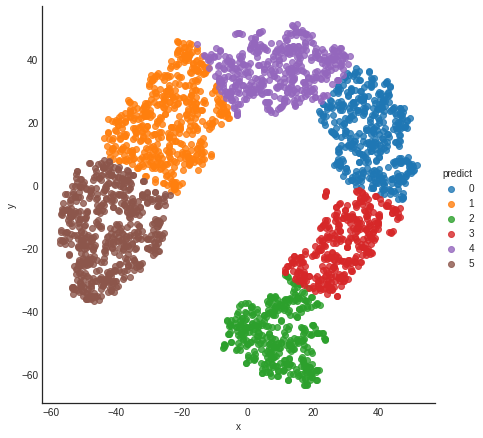

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')

6개의 군집이 형성된 것을 확인할 수 있다.